# SECTION 02. 딥러닝으로 AI모델링하기

## 3. 딥러닝 프레임워크

### 3) 텐서플로 설치 및 활용하기

In [ ]:
# tensorflow 라이브러리 설치하기
!pip install tensorflow

In [5]:
# 설치된 텐서플로 버전 확인하기
import tensorflow as tf
print(tf.__version__)

# 경고 무시하도록 설정
import warnings
warnings.filterwarnings("ignore")

2.17.0


In [6]:
# 필요한 라이브러리 불러오기
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 모델 학습 데이터 생성하기
x = [1, 2, 3, 4,  5, 6,  7,  8,  9, 10]
y = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
x_train = np.array(x)
x_train = x_train.reshape(-1, 1)
y_train = np.array(y)

print(f'입력 데이터 : {x_train}')
print(f'입력 데이터 형태: {x_train.shape}')
print(f'출력 데이터: {y_train}')
print(f'출력 데이터 형태 : {y_train.shape}')

입력 데이터 : [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
입력 데이터 형태: (10, 1)
출력 데이터: [ 3  5  7  9 11 13 15 17 19 21]
출력 데이터 형태 : (10,)


In [7]:
# Keras의 Sequential 모델 구성하기
initializer = tf.keras.initializers.GlorotUniform(seed=42) #모델 시드 고정하기
model = Sequential()
model.add(Dense(units=1, input_shape=(1,), kernel_initializer=initializer))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법 설정하기
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [9]:
# 모델 학습하기
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 323.2250 - mae: 16.1452
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.9011 - mae: 3.5555
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7542 - mae: 0.8584
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1045 - mae: 0.2802
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0741 - mae: 0.2255
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0721 - mae: 0.2238
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0715 - mae: 0.2230
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0709 - mae: 0.2223
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0703 - mae: 0.2214
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0697 - mae: 0.2205
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0691 - mae: 0.2196
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0685 - mae: 0.2187
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━

In [10]:
# 모델 가중치 확인하기
print(model.weights)

[<KerasVariable shape=(1, 1), dtype=float32, path=sequential_1/dense_1/kernel>, <KerasVariable shape=(1,), dtype=float32, path=sequential_1/dense_1/bias>]


In [11]:
# 모델 레이어의 가중치 출력하기
print(f'weight : {model.layers[0].weights[0].numpy()}')
print(f'bias : {model.layers[0].bias.numpy()}')

weight : [[2.001265]]
bias : [0.99119264]


In [12]:
# 학습 완료된 모델 사용하여 예측하기
print(model.predict(np.array([[11],[12],[13]])))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[23.005108]
 [25.006372]
 [27.007637]]


In [14]:
help(model.predict)

Help on method predict in module keras.src.backend.tensorflow.trainer:

predict(x, batch_size=None, verbose='auto', steps=None, callbacks=None) method of keras.src.models.sequential.Sequential instance
    Generates output predictions for the input samples.
    
    Computation is done in batches. This method is designed for batch
    processing of large numbers of inputs. It is not intended for use inside
    of loops that iterate over your data and process small numbers of inputs
    at a time.
    
    For small numbers of inputs that fit in one batch,
    directly use `__call__()` for faster execution, e.g.,
    `model(x)`, or `model(x, training=False)` if you have layers such as
    `BatchNormalization` that behave differently during
    inference.
    
    Note: See [this FAQ entry](
    https://keras.io/getting_started/faq/#whats-the-difference-between-model-methods-predict-and-call)
    for more details about the difference between `Model` methods
    `predict()` and `__call__(

In [13]:
# 클래스와 메소드 사용법 확인하기
help(model.fit)

Help on method fit in module keras.src.backend.tensorflow.trainer:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1) method of keras.src.models.sequential.Sequential instance
    Trains the model for a fixed number of epochs (dataset iterations).
    
    Args:
        x: Input data. It could be:
            - A NumPy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
            - A tensor, or a list of tensors
            (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
            - A `tf.data.Dataset`. Should return a tuple
            of either `(inputs, targets)` or
            `(inputs, target

## 4. 심층신경망으로 항공사 고객 만족 분류 모델 구현 실습하기

### 1) 데이터 로드 및 확인하기

In [15]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import warnings

# 경고 메시지를 무시하도록 설정하기
warnings.filterwarnings('ignore')

In [16]:
# csv 파일에서 데이터를 로드해서 데이터프레임으로 저장하기
df = pd.read_csv('./dataset/Invistico_Airline.csv')

# 데이터프레임 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [17]:
# 데이터프레임의 처음 5개 행의 데이터 출력하기
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [18]:
# 데이터프레임의 요약 통계량 확인하기
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [19]:
# 결측치 확인하기
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### 2) 데이터 전처리하기

#### (1) 결측치 처리하기 

In [21]:
# SimpleImputer 객체로 결측치 대체하기
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
df["Arrival Delay in Minutes"] = mean_imputer.fit_transform(df[["Arrival Delay in Minutes"]])

In [22]:
df["Arrival Delay in Minutes"].isnull().sum()

0

#### (2) 데이터 인코딩

In [24]:
# object 칼럼 유형을 string 유형으로 변경하기
cols = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']
df[cols] = df[cols].astype(str)
df[cols]

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco
...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,Personal Travel,Eco
129876,dissatisfied,Male,disloyal Customer,Personal Travel,Business
129877,dissatisfied,Male,disloyal Customer,Personal Travel,Eco
129878,dissatisfied,Male,disloyal Customer,Personal Travel,Eco


In [25]:
# 범주형 데이터를 수치값으로 변경하기
df['satisfaction'].replace(['dissatisfied','satisfied'], [0,1], inplace=True)

In [26]:
sum(df['satisfaction'] == 1), sum(df['satisfaction'] == 0)

(71087, 58793)

In [27]:
# 순서형 인코딩(Ordinal Encoding)하기
categories = pd.Categorical(
    df['Class'],
    categories=['Eco', 'Eco Plus', 'Business'],
    ordered=True
)

# pd.factorize(categories, sort=True) 첫번째 파라미터로 df['Class'] 사용하지 않는 이유:
# 카테고리의 특성에 따라 "Eco:0, Eco Plus:1, Business:2" 가 되어야 하는데 categories화 하여 순서를 지정하지 않으면 "Business:1, Eco:2, Eco Plus: 1" 과 같이 될 수 있다.
labels, unique = pd.factorize(categories, sort=True)
df['Class'] = labels

In [28]:
# 원핫 인코딩(One Hot Encoding)하기
cat_cols = ['Gender','Customer Type','Type of Travel']
df = pd.get_dummies(df, columns=cat_cols)

In [29]:
# 데이터 전처리 결과 확인하기
df.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,65,0,265,0,0,0,2,2,4,...,3,2,0,0.0,True,False,True,False,False,True
1,1,47,2,2464,0,0,0,3,0,2,...,3,2,310,305.0,False,True,True,False,False,True
2,1,15,0,2138,0,0,0,3,2,0,...,4,2,0,0.0,True,False,True,False,False,True
3,1,60,0,623,0,0,0,3,3,4,...,1,3,0,0.0,True,False,True,False,False,True
4,1,70,0,354,0,0,0,3,4,3,...,2,5,0,0.0,True,False,True,False,False,True


In [30]:
# 데이터 유형 확인하기
df.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Gender_Female                           bool
Gender_Male                             bool
Customer T

#### (3) 데이터셋 분리하기

In [31]:
from sklearn.model_selection import train_test_split

# 데이터셋을 입력(X)과 레이블(y)로 분리하기
X = df.drop(['satisfaction'], axis=1)

# df['satisfaction']을 추출하는 과정에서 원본 데이터프레임 df의 인덱스가 그대로 유지됩니다. 
# 원본 데이터프레임이 어떤 이유로 인덱스가 변경되었거나, 행이 삭제된 경우, 인덱스가 연속되지 않을 수 있습니다.
# 데이터셋을 train_test_split으로 나누거나 다른 머신러닝 작업을 수행할 때, 인덱스가 연속적이고 일관되게 유지되는 것이 좋습니다. 이는 데이터 추적 및 관리 측면에서 더 명확하게 할 수 있습니다.
y = df['satisfaction'].reset_index(drop=True)

# 데이터셋을 훈련 데이터와 검증 데이터로 분리하기
X_train, X_val, y_train, y_val = train_test_split(X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y)

print(f'훈련 데이터셋 크기 : X_train {X_train.shape}, y_train {y_train.shape}')
print(f'검증 데이터셋 크기 : X_val {X_val.shape}, y_val {y_val.shape}')

훈련 데이터셋 크기 : X_train (103904, 25), y_train (103904,)
검증 데이터셋 크기 : X_val (25976, 25), y_val (25976,)


#### (4) 데이터 스케일링하기

In [32]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 정규화하기
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

print(X_train)

[[0.15384615 0.         0.34502246 ... 1.         1.         0.        ]
 [0.33333333 0.         0.44051587 ... 1.         1.         0.        ]
 [0.48717949 0.         0.26546877 ... 0.         1.         0.        ]
 ...
 [0.35897436 1.         0.31459209 ... 0.         1.         0.        ]
 [0.17948718 0.         0.25010868 ... 0.         0.         1.        ]
 [0.19230769 1.         0.62860455 ... 0.         1.         0.        ]]


### 3) 심층신경망 모델 생성하기

In [33]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

# 모델 시드 고정하기
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Keras의 Sequential 객체로 딥러닝 모델 구성하기
initializer = tf.keras.initializers.GlorotUniform(seed=42) #모델 시드 고정하기
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(25,),kernel_initializer=initializer))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [34]:
# 모델 구조 및 파라미터 정보 확인하기
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,633 (84.50 KB)

 Trainable params: 21,633 (84.50 KB)

 Non-trainable params: 0 (0.00 B)

### 4) 모델 컴파일하기

In [35]:
# 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법 설정하기
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

### 5) 모델 학습하기

In [36]:
# 모델 학습하기
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=128,
          verbose=1, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.8300 - loss: 0.3657 - val_accuracy: 0.9199 - val_loss: 0.1915
Epoch 2/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.9217 - loss: 0.1909 - val_accuracy: 0.9341 - val_loss: 0.1562
Epoch 3/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.9331 - loss: 0.1572 - val_accuracy: 0.9415 - val_loss: 0.1348
Epoch 4/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.9395 - loss: 0.1418 - val_accuracy: 0.9431 - val_loss: 0.1296
Epoch 5/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.9433 - loss: 0.1328 - val_accuracy: 0.9440 - val_loss: 0.1265
Epoch 6/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.9454 - loss: 0.1276 - val_accuracy: 0.9460 - val_loss: 0.1234
Epoch 7/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.9469 - loss: 0.1230 - val_accuracy: 0.9483 - val_loss: 0.1202
Epoch 8/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.9481 - loss: 0

### 6) 모델 훈련 과정 시각화하기

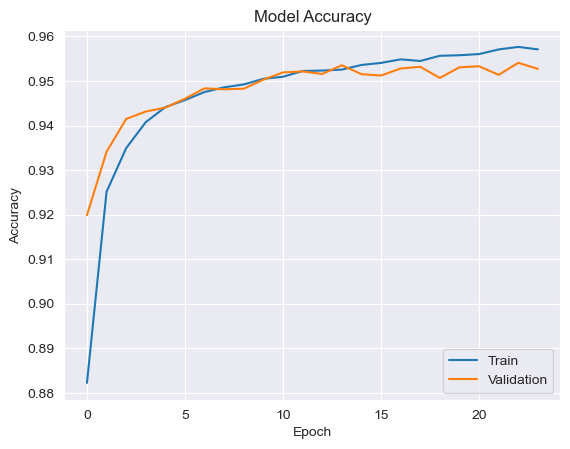

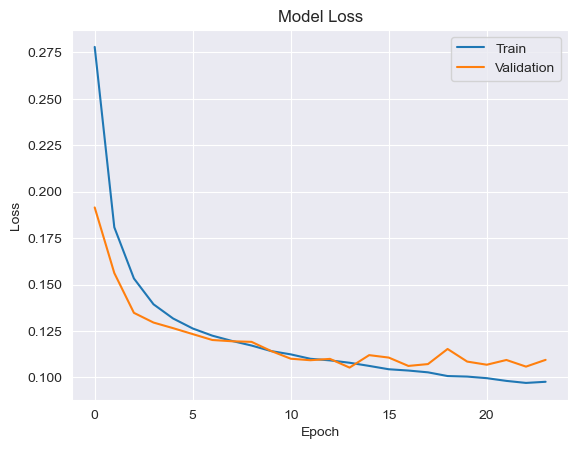

In [37]:
import matplotlib.pyplot as plt

# 훈련 과정 정확도(accuracy) 시각화하기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# 훈련 과정 손실(loss) 시각화하기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()